In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "/content/drive/MyDrive/IdentityResolution.csv"
df = pd.read_csv(url)

In [3]:
#Visualize data

df.columns = ['Name','Twitter','Facebook','Instagram']

In [4]:
df.head()

,Name,Twitter,Facebook,Instagram
0,Alex Sablan,https://www.twitter.com/AlexSablancom,https://facebook.com/alexsablancom,http://instagram.com/a_sablan
1,Xavier Gass,https://www.twitter.com/XaviGasso,http://www.facebook.com/xgasso,http://instagram.com/xavigasso
2,Nicole Lapin,https://www.twitter.com/NicoleLapin,http://www.facebook.com/nicolelapin,http://instagram.com/nicolelapin
3,Mattan Griffel,https://www.twitter.com/mattangriffel,http://www.facebook.com/mattangriffel,http://instagram.com/mattangriffel
4,Shashank Bharadwaj,https://www.twitter.com/snk,https://www.facebook.com/shashu10,http://instagram.com/shashu10


**Extracting Username from profile url of all the social networks sites**

In [5]:
def getUsername(x):
  x = x.split('/')
  x = x[-1]
  return x.lower();

In [6]:
for i in range(1,4):
  # print(df.iloc[:,i])
  df.iloc[:,i] = df.iloc[:,i].apply(lambda x: getUsername(x))


In [7]:
df

,Name,Twitter,Facebook,Instagram
0,Alex Sablan,alexsablancom,alexsablancom,a_sablan
1,Xavier Gass,xavigasso,xgasso,xavigasso
2,Nicole Lapin,nicolelapin,nicolelapin,nicolelapin
3,Mattan Griffel,mattangriffel,mattangriffel,mattangriffel
4,Shashank Bharadwaj,snk,shashu10,shashu10
...,...,...,...,...
318,Vasu Chawla,vasuchawla,vasuchawla26,vasuchawla
319,Dayn Wilberding,dayn,daynw,dayn
320,Guillermo Navarro,bildenlex,drguillermonavarro,bildenlex
321,Antonio J. Cuevas,zeroneuronas,antonio.j.cuevas,zeroneuronas


**Now we have the username for futher analysis**

**The Two distance metrics I'll be using are "HAMMING" and "LEVENSHTEIN"**


*   Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other.
*    The Levenshtein distance is a string metric for measuring the difference between two sequences. Informally, the Levenshtein distance between two words is the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other.



In [ ]:
pip install textdistance


In [10]:
import textdistance as td

In [12]:
tf = df.iloc[:,[1,2]]  ## Twitter-Facbook linkage
ti = df.iloc[:,[1,3]]  ## Twitter-Instagram linkage
fi = df.iloc[:,[2,3]]  ## Facebook-Instagram linkage

In [ ]:
def get_score(df1):
  df1['Hamming'] = ""
  df1['Similarity'] = ""
  df1['levenshtein'] = ""
  df1['lev_Similar'] = ""

  for i in range(0,323):
    df1.iat[i,2] = td.hamming.distance(df1.iat[i,0],df1.iat[i,1])
    df1.iat[i,3] = td.hamming.normalized_similarity(df1.iat[i,0],df1.iat[i,1])
    
    df1.iat[i,4] = td.levenshtein.distance(df1.iat[i,0],df1.iat[i,1])
    df1.iat[i,5] = td.levenshtein.normalized_similarity(df1.iat[i,0],df1.iat[i,1])
  return df1

In [36]:
def count_plot(data):
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)
  ax = sns.countplot(x='Hamming',data=data, palette = 'dark')
  ax.set_title(label = 'Count of Hamming Distance', fontsize = 20)
  ax.set_xlabel(xlabel = 'Hamming Distance', fontsize = 16)
  ax.set_ylabel(ylabel = 'Count', fontsize = 16)
  # plt.show()

  # plt.figure(figsize = (13, 8))
  plt.subplot(1, 2, 2)
  ax = sns.countplot(x='levenshtein',data=tf, palette = 'dark')
  ax.set_title(label = 'Count of levenshtein Distance', fontsize = 20)
  ax.set_xlabel(xlabel = 'levenshtein Distance', fontsize = 16)
  ax.set_ylabel(ylabel = 'Count', fontsize = 16)
  plt.show()

def line_plot(data):
  plt.subplots(figsize=(16,6))
  plt.subplot(1, 2, 1)
  plt.title('Hamming vs Similarity', fontsize = 20, fontweight = 15)
  sns.lineplot(x="Hamming",y = 'Similarity',data=tf)

  plt.subplot(1, 2, 2)
  plt.title('Levenshtein vs Similarity', fontsize = 20, fontweight = 15)
  sns.lineplot(x= 'levenshtein',y='lev_Similar',data = tf)
  plt.show()

**Twitter-Facebook**





In [13]:
tf

,Twitter,Facebook
0,alexsablancom,alexsablancom
1,xavigasso,xgasso
2,nicolelapin,nicolelapin
3,mattangriffel,mattangriffel
4,snk,shashu10
...,...,...
318,vasuchawla,vasuchawla26
319,dayn,daynw
320,bildenlex,drguillermonavarro
321,zeroneuronas,antonio.j.cuevas


In [ ]:
df1 = tf
tf = get_score(df1)

In [16]:
tf

,Twitter,Facebook,Hamming,Similarity,levenshtein,lev_Similar
0,alexsablancom,alexsablancom,0,1,0,1
1,xavigasso,xgasso,8,0.111111,3,0.666667
2,nicolelapin,nicolelapin,0,1,0,1
3,mattangriffel,mattangriffel,0,1,0,1
4,snk,shashu10,7,0.125,7,0.125
...,...,...,...,...,...,...
318,vasuchawla,vasuchawla26,2,0.833333,2,0.833333
319,dayn,daynw,1,0.8,1,0.8
320,bildenlex,drguillermonavarro,16,0.111111,14,0.222222
321,zeroneuronas,antonio.j.cuevas,14,0.125,12,0.25


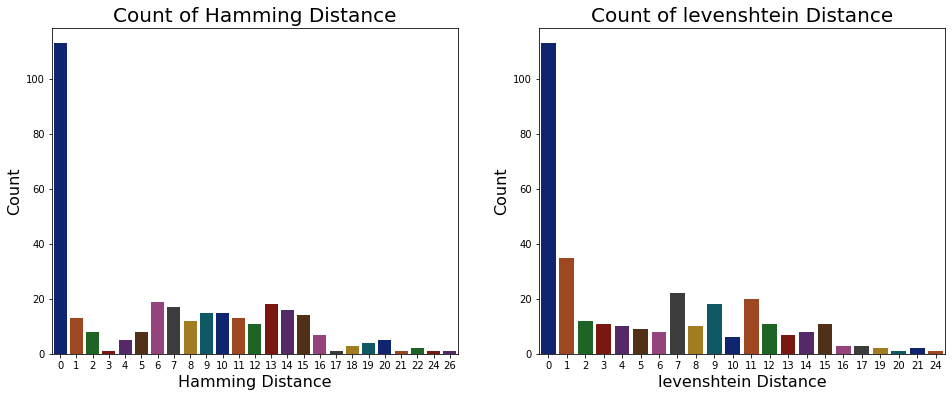

In [41]:
count_plot(tf)

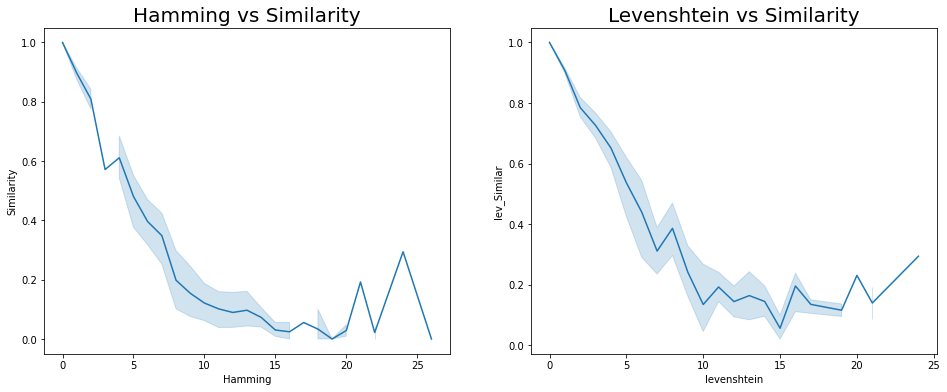

In [42]:

line_plot(tf)

In [45]:
tt = []


for i in range(0,323):
  tt.append(td.lcsstr.distance(tf.iat[i,0],tf.iat[i,1]))

In [ ]:
tt

**Twitter-Instagram**

In [17]:
ti

,Twitter,Instagram
0,alexsablancom,a_sablan
1,xavigasso,xavigasso
2,nicolelapin,nicolelapin
3,mattangriffel,mattangriffel
4,snk,shashu10
...,...,...
318,vasuchawla,vasuchawla
319,dayn,dayn
320,bildenlex,bildenlex
321,zeroneuronas,zeroneuronas


In [19]:
df1 = ti
ti = get_score(df1)
ti

,Twitter,Instagram,Hamming,Similarity,levenshtein,lev_Similar
0,alexsablancom,a_sablan,12,0.0769231,6,0.538462
1,xavigasso,xavigasso,0,1,0,1
2,nicolelapin,nicolelapin,0,1,0,1
3,mattangriffel,mattangriffel,0,1,0,1
4,snk,shashu10,7,0.125,7,0.125
...,...,...,...,...,...,...
318,vasuchawla,vasuchawla,0,1,0,1
319,dayn,dayn,0,1,0,1
320,bildenlex,bildenlex,0,1,0,1
321,zeroneuronas,zeroneuronas,0,1,0,1


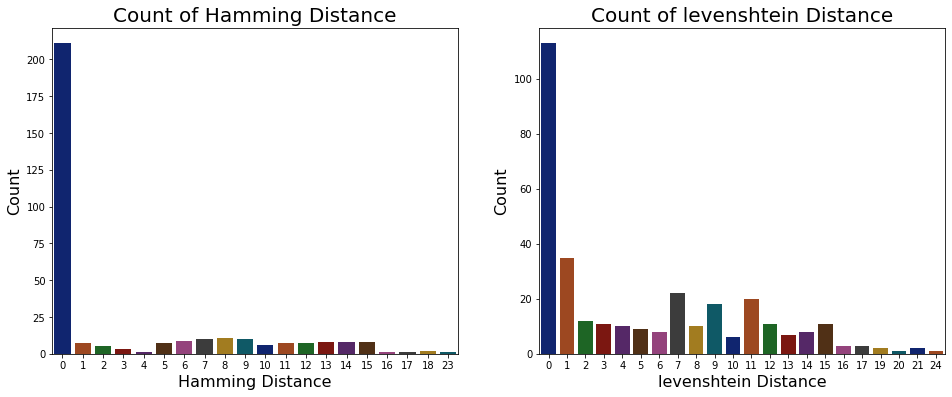

In [37]:
count_plot(ti)

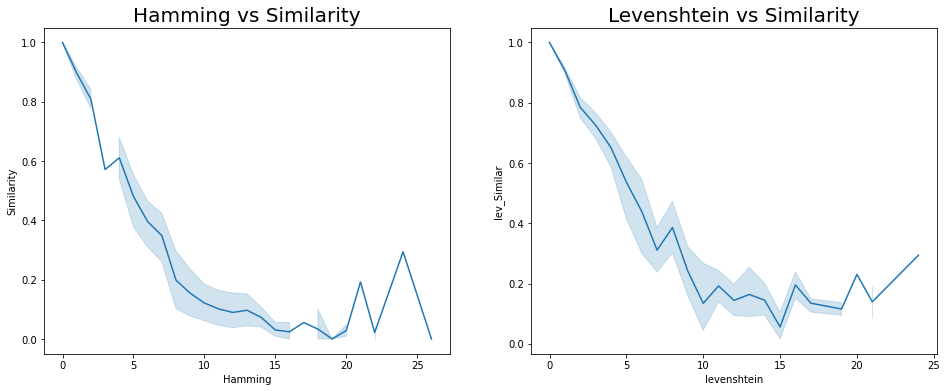

In [38]:
line_plot(ti)

**Facebook-Instagram**

In [20]:
fi

,Facebook,Instagram
0,alexsablancom,a_sablan
1,xgasso,xavigasso
2,nicolelapin,nicolelapin
3,mattangriffel,mattangriffel
4,shashu10,shashu10
...,...,...
318,vasuchawla26,vasuchawla
319,daynw,dayn
320,drguillermonavarro,bildenlex
321,antonio.j.cuevas,zeroneuronas


In [22]:
df1 = fi
fi = get_score(df1)
fi

,Facebook,Instagram,Hamming,Similarity,levenshtein,lev_Similar
0,alexsablancom,a_sablan,12,0.0769231,6,0.538462
1,xgasso,xavigasso,8,0.111111,3,0.666667
2,nicolelapin,nicolelapin,0,1,0,1
3,mattangriffel,mattangriffel,0,1,0,1
4,shashu10,shashu10,0,1,0,1
...,...,...,...,...,...,...
318,vasuchawla26,vasuchawla,2,0.833333,2,0.833333
319,daynw,dayn,1,0.8,1,0.8
320,drguillermonavarro,bildenlex,16,0.111111,14,0.222222
321,antonio.j.cuevas,zeroneuronas,14,0.125,12,0.25


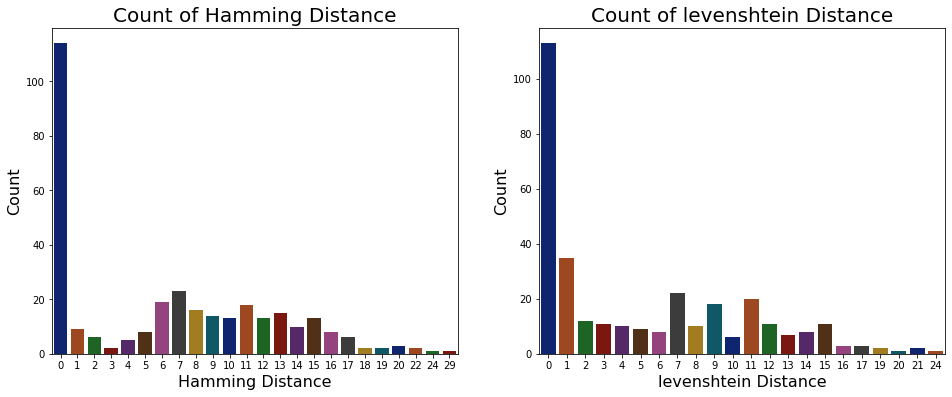

In [39]:
count_plot(fi)

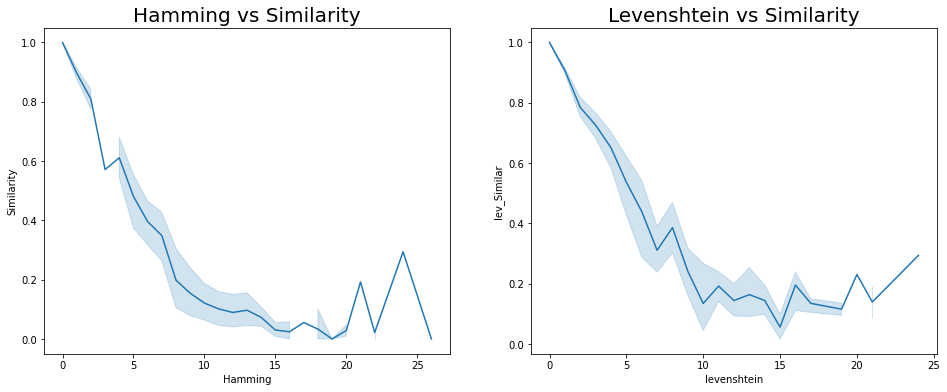

In [40]:
line_plot(fi)

In [48]:
tf['lev_Similar'].value_counts()

1.000000    113
0.000000     18
0.153846      6
0.909091      6
0.666667      6
           ... 
0.071429      1
0.454545      1
0.533333      1
0.857143      1
0.136364      1
Name: lev_Similar, Length: 87, dtype: int64

In [49]:
ti['lev_Similar'].value_counts()

1.000000    211
0.000000     12
0.333333      5
0.111111      4
0.583333      4
0.928571      4
0.222222      4
0.875000      4
0.857143      4
0.200000      3
0.888889      3
0.571429      3
0.166667      3
0.153846      3
0.777778      3
0.230769      3
0.428571      2
0.666667      2
0.714286      2
0.833333      2
0.800000      2
0.133333      2
0.066667      2
0.444444      2
0.272727      2
0.250000      2
0.454545      2
0.125000      2
0.100000      2
0.909091      2
0.625000      1
0.500000      1
0.384615      1
0.529412      1
0.545455      1
0.923077      1
0.142857      1
0.266667      1
0.700000      1
0.818182      1
0.933333      1
0.076923      1
0.900000      1
0.260870      1
0.466667      1
0.307692      1
0.285714      1
0.214286      1
0.416667      1
0.357143      1
0.400000      1
0.538462      1
Name: lev_Similar, dtype: int64

In [50]:
fi['lev_Similar'].value_counts()

1.000000    114
0.000000     18
0.666667      6
0.916667      6
0.153846      6
           ... 
0.437500      1
0.652174      1
0.615385      1
0.692308      1
0.642857      1
Name: lev_Similar, Length: 86, dtype: int64

From above analysis we can conclude that the pair Twitter-Instagram has the max comman name username, followed by Facebook-Instagram and then Twitter-Facebook